### Read in Data

In [1]:

import pandas as pd
import numpy as np
df = pd.read_excel("oxford_comma.xlsx")
df

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,3288387618,"It's important for a person to be honest, kind...",Yes,A lot,"Some experts say it's important to drink milk,...",No,A lot,Very important,Female,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic
1125,3288387379,"It's important for a person to be honest, kind...",No,Some,"Some experts say it's important to drink milk,...",No,Some,Very important,Female,30-44,"$50,000 - $99,999",Some college or Associate degree,Pacific
1126,3288382543,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Female,30-44,"$50,000 - $99,999",Graduate degree,Middle Atlantic
1127,3288379152,"It's important for a person to be honest, kind...",Yes,A lot,"Some experts say it's important to drink milk,...",Yes,Not much,Very important,Female,45-60,"$50,000 - $99,999",Graduate degree,East South Central


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   RespondentID                                                                                                            1129 non-null   int64 
 1   In your opinion, which sentence is more gramatically correct?                                                           1129 non-null   object
 2   Prior to reading about it above, had you heard of the serial (or Oxford) comma?                                         1099 non-null   object
 3   How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?            1099 non-null   object
 4   

### Preprocessing

Since the data is only categorical, we look at datasets using both label and OneHot encoding to create columns of binary variables. Models are tested using both datasets to analyze potential advantages to one or the other. The ordinal dataset is used first.

# Ordinal Dataset

In [3]:
# Ordinal dataset creation
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

le = LabelEncoder()

# referencing classification example provided in Exercise 4
# dropping rows with over 75% NaN values
min_count = int(((100-75)/100) * df.shape[1] + 1)
df1 = df.dropna(axis=0, thresh=min_count)
df1.columns = ["respondent_ID", "more_grammatically_correct", "heard_of_oxford_comma", 
               "care_about_oxford_comma", "how_write_sentence", "data_singular_plural", 
               "debate_over_data", "importance_of_grammar", "gender", "age", "household_income", 
               "education", "location"]
print(len(df1))
# handling categorical data
# mapping ordinal features and binary features
# feature 1
print(np.unique(df1["heard_of_oxford_comma"]))
df1["heard_of_oxford_comma"] = df1["heard_of_oxford_comma"].replace("No", 0)
df1["heard_of_oxford_comma"] = df1["heard_of_oxford_comma"].replace("Yes", 1)

# feature 2
print(np.unique(df1["care_about_oxford_comma"]))
care_about_oc_mapping = {"Not at all": 1,
                         "Not much": 2,
                         "Some": 3,
                         "A lot": 4}
df1.loc[:,"care_about_oxford_comma"] = df1.loc[:,"care_about_oxford_comma"].map(care_about_oc_mapping)

# feature 3
print(df1["how_write_sentence"].unique())
print(df1["how_write_sentence"].isnull().sum())
# use mode imputation for the 6 missing values because it reflects the most frequent answer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(df1[["how_write_sentence"]])
df1["how_write_sentence"] = imr.transform(df1[["how_write_sentence"]])
print(df1["how_write_sentence"].unique())
df1["how_write_sentence"] = df1["how_write_sentence"].replace("Some experts say it's important to drink milk, but the data is inconclusive.", 1)
df1["how_write_sentence"] = df1["how_write_sentence"].replace("Some experts say it's important to drink milk, but the data are inconclusive.", 0)

# feature 4
print(df1["data_singular_plural"].unique())
print(df1["data_singular_plural"].isnull().sum())
# use mode imputation for the 8 missing values because it reflects the most frequent answer
imr2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr2 = imr2.fit(df1[["data_singular_plural"]])
df1["data_singular_plural"] = imr2.transform(df1[["data_singular_plural"]])
print(df1["data_singular_plural"].unique())
df1["data_singular_plural"] = df1["data_singular_plural"].replace("No", 0)
df1["data_singular_plural"] = df1["data_singular_plural"].replace("Yes", 1)

# feature 5
print(df1["debate_over_data"].unique())
print(df1["debate_over_data"].isnull().sum())
# use mode imputation
imr3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr3 = imr3.fit(df1[["debate_over_data"]])
df1["debate_over_data"] = imr3.transform(df1[["debate_over_data"]])
print(df1["debate_over_data"].unique())
debate_mapping = {"Not at all": 1,
                         "Not much": 2,
                         "Some": 3,
                         "A lot": 4}
df1.loc[:,"debate_over_data"] = df1.loc[:,"debate_over_data"].map(debate_mapping)

# feature 6
print(df1["importance_of_grammar"].unique())
print(df1["importance_of_grammar"].isnull().sum())
# use mode imputation
imr4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr4 = imr4.fit(df1[["importance_of_grammar"]])
df1["importance_of_grammar"] = imr4.transform(df1[["importance_of_grammar"]])
print(df1["importance_of_grammar"].unique())
importance_mapping = {"Very unimportant": 1,
                      "Somewhat unimportant": 2,
                      "Neither important nor unimportant (neutral)": 3,
                      "Somewhat important": 4,
                      "Very important": 5}
df1.loc[:,"importance_of_grammar"] = df1.loc[:,"importance_of_grammar"].map(importance_mapping)

# feature 7
print(df1["gender"].unique())
print(df1["gender"].isnull().sum())
# use mode imputation
imr5 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr5 = imr5.fit(df1[["gender"]])
df1["gender"] = imr5.transform(df1[["gender"]])
print(df1["gender"].unique())
df1["gender"] = df1["gender"].replace("Male", 0)
df1["gender"] = df1["gender"].replace("Female", 1)

# feature 8
print(df1["age"].unique())
print(df1["age"].isnull().sum())
# use mode imputation
imr6 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr6 = imr6.fit(df1[["age"]])
df1["age"] = imr6.transform(df1[["age"]])
print(df1["age"].unique())
age_mapping = {"18-29": 1,
               "30-44": 2,
               "45-60": 3,
               "> 60": 4}
df1.loc[:,"age"] = df1.loc[:,"age"].map(age_mapping)

# feature 10
print(df1["education"].unique())
print(df1["education"].isnull().sum())
# use mode imputation
imr8 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr8 = imr8.fit(df1[["education"]])
df1["education"] = imr8.transform(df1[["education"]])
print(df1["education"].unique())
educ_mapping = {"Less than high school degree": 1,
                "High school degree": 2,
                "Some college or Associate degree": 3,
                "Bachelor degree": 4,
                "Graduate degree": 5}
df1.loc[:,"education"] = df1.loc[:,"education"].map(educ_mapping)

No Warning Shown
1099
['No' 'Yes']
['A lot' 'Not at all' 'Not much' 'Some']
["Some experts say it's important to drink milk, but the data is inconclusive."
 "Some experts say it's important to drink milk, but the data are inconclusive."
 nan]
6
["Some experts say it's important to drink milk, but the data is inconclusive."
 "Some experts say it's important to drink milk, but the data are inconclusive."]
['No' 'Yes' nan]
8
['No' 'Yes']
['Not much' 'Not at all' 'Some' 'A lot' nan]
8
['Not much' 'Not at all' 'Some' 'A lot']
['Somewhat important' 'Somewhat unimportant' 'Very important' nan
 'Very unimportant' 'Neither important nor unimportant (neutral)']
40
['Somewhat important' 'Somewhat unimportant' 'Very important'
 'Very unimportant' 'Neither important nor unimportant (neutral)']
['Male' nan 'Female']
62
['Male' 'Female']
['30-44' '18-29' nan '> 60' '45-60']
62
['30-44' '18-29' '45-60' '> 60']
['Bachelor degree' 'Graduate degree' nan 'Less than high school degree'
 'Some college or As

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

# feature 9
print(df1["household_income"].unique())
print(df1["household_income"].isnull().sum())
temp = df1[df1['household_income'].isna()]

X_hi_test = temp.iloc[:, [8, 9, 11]]
exclude_index = temp.index
temp2 = df1.copy()
temp2 = temp2.drop(index=exclude_index)
hi_mapping = {"$0 - $24,999": 1,
              "$25,000 - $49,999": 2,
              "$50,000 - $99,999": 3,
              "$100,000 - $149,999": 4,
              "$150,000+": 5}
temp2["household_income"] = temp2["household_income"].map(hi_mapping)
print(temp2)
X_hi_train = temp2.iloc[:, [8, 9, 11]]
y_hi_train = temp2.iloc[:, 10]

model_hi = LogisticRegression()
model_hi.fit(X_hi_train, y_hi_train)
y_hi_pred = model_hi.predict(X_hi_test)
print(y_hi_pred)

temp["household_income"] = y_hi_pred
df1.loc[exclude_index, "household_income"] = temp.loc[:, "household_income"]
df1

No Warning Shown
['$50,000 - $99,999' nan '$25,000 - $49,999' '$0 - $24,999' '$150,000+'
 '$100,000 - $149,999']
263
      respondent_ID                         more_grammatically_correct  \
0        3292953864  It's important for a person to be honest, kind...   
1        3292950324  It's important for a person to be honest, kind...   
5        3292926586  It's important for a person to be honest, kind...   
6        3292908135  It's important for a person to be honest, kind...   
7        3292869879  It's important for a person to be honest, kind...   
...             ...                                                ...   
1124     3288387618  It's important for a person to be honest, kind...   
1125     3288387379  It's important for a person to be honest, kind...   
1126     3288382543  It's important for a person to be honest, kind...   
1127     3288379152  It's important for a person to be honest, kind...   
1128     3288375700  It's important for a person to be honest, kind..

,respondent_ID,more_grammatically_correct,heard_of_oxford_comma,care_about_oxford_comma,how_write_sentence,data_singular_plural,debate_over_data,importance_of_grammar,gender,age,household_income,education,location
0,3292953864,"It's important for a person to be honest, kind...",1,3,1,0,2,4,0,2,"$50,000 - $99,999",4,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",0,2,1,0,2,2,0,2,"$50,000 - $99,999",5,Mountain
2,3292942669,"It's important for a person to be honest, kind...",1,3,1,1,1,5,0,2,3,4,East North Central
3,3292932796,"It's important for a person to be honest, kind...",1,3,1,0,3,4,0,1,1,1,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",0,2,1,0,2,5,1,3,3,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,3288387618,"It's important for a person to be honest, kind...",1,4,1,0,4,5,1,1,"$100,000 - $149,999",3,South Atlantic
1125,3288387379,"It's important for a person to be honest, kind...",0,3,1,0,3,5,1,2,"$50,000 - $99,999",3,Pacific
1126,3288382543,"It's important for a person to be honest, kind...",1,3,1,0,2,4,1,2,"$50,000 - $99,999",5,Middle Atlantic
1127,3288379152,"It's important for a person to be honest, kind...",1,4,1,1,2,5,1,3,"$50,000 - $99,999",5,East South Central


In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

print(df1["household_income"].unique())
hi_mapping1 = {"$0 - $24,999": 1,
              "$25,000 - $49,999": 2,
              "$50,000 - $99,999": 3,
              "$100,000 - $149,999": 4,
              "$150,000+": 5,
              1: 1,
              2: 2,
              3: 3}
df1.loc[:,"household_income"] = df1.loc[:,"household_income"].map(hi_mapping1)

No Warning Shown
['$50,000 - $99,999' 3 1 '$25,000 - $49,999' '$0 - $24,999' '$150,000+'
 '$100,000 - $149,999' 2]


In [6]:
df1

,respondent_ID,more_grammatically_correct,heard_of_oxford_comma,care_about_oxford_comma,how_write_sentence,data_singular_plural,debate_over_data,importance_of_grammar,gender,age,household_income,education,location
0,3292953864,"It's important for a person to be honest, kind...",1,3,1,0,2,4,0,2,3,4,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",0,2,1,0,2,2,0,2,3,5,Mountain
2,3292942669,"It's important for a person to be honest, kind...",1,3,1,1,1,5,0,2,3,4,East North Central
3,3292932796,"It's important for a person to be honest, kind...",1,3,1,0,3,4,0,1,1,1,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",0,2,1,0,2,5,1,3,3,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,3288387618,"It's important for a person to be honest, kind...",1,4,1,0,4,5,1,1,4,3,South Atlantic
1125,3288387379,"It's important for a person to be honest, kind...",0,3,1,0,3,5,1,2,3,3,Pacific
1126,3288382543,"It's important for a person to be honest, kind...",1,3,1,0,2,4,1,2,3,5,Middle Atlantic
1127,3288379152,"It's important for a person to be honest, kind...",1,4,1,1,2,5,1,3,3,5,East South Central


In [26]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

# feature 11
print(df1["location"].unique())
print(df1["location"].isnull().sum())
# use mode imputation
imr9 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr9 = imr9.fit(df1[["location"]])
df1["location"] = imr9.transform(df1[["location"]])

x = df1[["location"]].values
print("this:", x[:,0])
x[:,0] = le.fit_transform(x[:,0])
print("this2:", x)
ohe = OneHotEncoder()
array = ohe.fit_transform(x).toarray()
df_of_dummies = pd.DataFrame(array)
df_of_dummies.columns = ["east_north_central", "east_south_central", "middle_atlantic", "mountain",
                         "new_england", "pacific", "south_atlantic", "west_north_central",
                         "west_south_central"]
df2 = df1.reset_index()
frames = [df2, df_of_dummies]
df3 = pd.concat(frames, axis=1)

# encoding class labels
class_mapping = {label: idx for idx, label in enumerate(np.unique(df3["more_grammatically_correct"]))}
df3["more_grammatically_correct"] = df3["more_grammatically_correct"].map(class_mapping)
df3 = df3.drop(['index', 'respondent_ID', 'location'], axis=1)
df3

No Warning Shown
['South Atlantic' 'Mountain' 'East North Central' 'Middle Atlantic'
 'Pacific' 'New England' 'East South Central' 'West North Central'
 'West South Central']
0
this: ['South Atlantic' 'Mountain' 'East North Central' ... 'Middle Atlantic'
 'East South Central' 'Mountain']
this2: [[6]
 [3]
 [0]
 ...
 [2]
 [1]
 [3]]


,more_grammatically_correct,heard_of_oxford_comma,care_about_oxford_comma,how_write_sentence,data_singular_plural,debate_over_data,importance_of_grammar,gender,age,household_income,education,east_north_central,east_south_central,middle_atlantic,mountain,new_england,pacific,south_atlantic,west_north_central,west_south_central
0,0,1,3,1,0,2,4,0,2,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2,1,0,2,2,0,2,3,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,3,1,1,1,5,0,2,3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,3,1,0,3,4,0,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2,1,0,2,5,1,3,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1,1,4,1,0,4,5,1,1,4,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1095,0,0,3,1,0,3,5,1,2,3,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1096,1,1,3,1,0,2,4,1,2,3,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,0,1,4,1,1,2,5,1,3,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Resample to Balance Dataset

In [27]:
df3.groupby(["more_grammatically_correct"])["more_grammatically_correct"].count()

more_grammatically_correct
0    476
1    623
Name: more_grammatically_correct, dtype: int64

In [32]:
# oversampling
np.random.seed(45)
only_zero = df3.loc[df3["more_grammatically_correct"] == 0]
duplicates = only_zero.sample(n=147)
df3 = df3.append(duplicates, ignore_index=True)
df_ordinal = df3.copy()

### Partition Data into Train and Test Sets

In [164]:
# now that the features have been processed, move to partitioning data
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X, y = df_ordinal.iloc[:,1:].values, df_ordinal.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# scaling is not necessary because all features are categorical variables

## Feature Selection - kNN and Random Forest

#### kNN for Feature Selection

In [165]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.30, random_state=0):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

First, find optimal number of neighbors to maximize test accuracy

[0.7406143344709898, 0.7337883959044369, 0.7337883959044369, 0.7440273037542662, 0.7440273037542662, 0.7201365187713311, 0.7372013651877133, 0.7440273037542662]


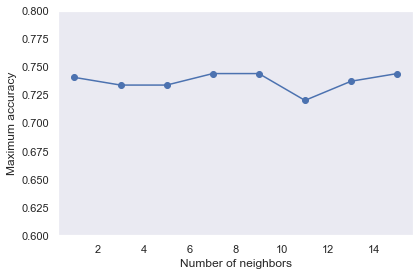

In [166]:
from sklearn.neighbors import KNeighborsClassifier
max_accuracy = []
for i in [1,3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors=i)
    sbs = SBS(knn, k_features=1)
    sbs.fit(X_train, y_train)
    max_accuracy.append(max(sbs.scores_))
print(max_accuracy)

# select 7 neighbors
    

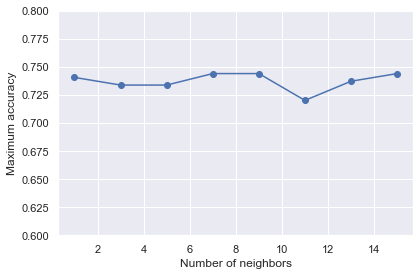

In [254]:
import matplotlib.pyplot as plt

plt.plot([1,3,5,7,9,11,13,15], max_accuracy, marker='o')
plt.ylim([0.6,0.8])
plt.ylabel("Maximum accuracy")
plt.xlabel("Number of neighbors")
plt.grid(True)
plt.tight_layout()
plt.show()

Use similar technique to find optimal number of features

[0.6825938566552902, 0.7201365187713311, 0.726962457337884, 0.7235494880546075, 0.7235494880546075, 0.7440273037542662, 0.726962457337884, 0.7133105802047781, 0.7064846416382252, 0.7064846416382252, 0.7030716723549488, 0.7064846416382252, 0.7133105802047781, 0.689419795221843, 0.658703071672355, 0.6689419795221843, 0.621160409556314, 0.6040955631399317, 0.5563139931740614]
Max accuracy: 0.7440273037542662


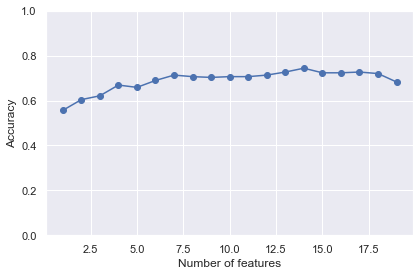

In [255]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

k_features = [len(k) for k in sbs.subsets_]
print(sbs.scores_)
print("Max accuracy:", max(sbs.scores_))

plt.plot(k_features, sbs.scores_, marker='o')
plt.ylim([0,1])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
k14 = list(sbs.subsets_[5])
# from each number of dimensions starting with the max num, it appended the combination that yields 
# the highest accuracy
print(len(k14))
print(df_ordinal.columns[1:][k14])

14
Index(['heard_of_oxford_comma', 'care_about_oxford_comma',
       'how_write_sentence', 'data_singular_plural', 'importance_of_grammar',
       'gender', 'household_income', 'education', 'east_north_central',
       'east_south_central', 'middle_atlantic', 'new_england',
       'south_atlantic', 'west_south_central'],
      dtype='object')


#### Random Forest for Feature Selection

No Warning Shown


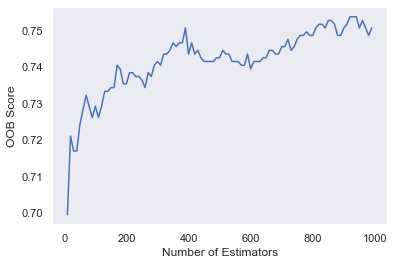

In [169]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

oob_vals = []
vary_num_trees = list(range(10,1000,10))
for i in vary_num_trees:
    forest = RandomForestClassifier(n_estimators=i, random_state=0, oob_score=True)
    forest.fit(X_train, y_train)
    oob_vals.append(forest.oob_score_)

plt.plot(vary_num_trees, oob_vals)
ax = plt.axes()

ax.set_facecolor("white")
plt.xlabel("Number of Estimators")
plt.ylabel("OOB Score")

plt.grid(True)
plt.show()
# choose n_estimators=800 

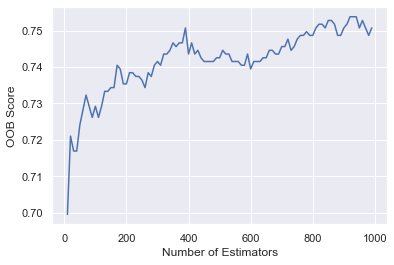

In [260]:
plt.plot(vary_num_trees, oob_vals)

plt.xlabel("Number of Estimators")
plt.ylabel("OOB Score")
plt.grid(True)
plt.show()

In [171]:
feat_labels = df_ordinal.columns[1:]
forest = RandomForestClassifier(n_estimators=800, random_state=0, oob_score=True)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.oob_score_)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

0.9917948717948718
0.7487179487179487
 1) care_about_oxford_comma        0.130176
 2) age                            0.122940
 3) household_income               0.109849
 4) education                      0.106368
 5) debate_over_data               0.092121
 6) importance_of_grammar          0.058854
 7) gender                         0.051589
 8) data_singular_plural           0.049701
 9) heard_of_oxford_comma          0.048178
10) how_write_sentence             0.039680
11) pacific                        0.030992
12) middle_atlantic                0.025818
13) south_atlantic                 0.025602
14) east_north_central             0.024635
15) west_south_central             0.018979
16) new_england                    0.018653
17) west_north_central             0.018234
18) mountain                       0.017168
19) east_south_central             0.010464


In [172]:
# choose top eight features
top_eight = [0,1, 4, 5, 6, 7, 8, 9]

In [173]:
# create new training and testing datasets, so as to not implement kNN and RF on the same training dataset used to
# obtain their corresponding subset of features

X_dif, y_dif = df_ordinal.iloc[:,1:].values, df_ordinal.iloc[:,0].values
X_train_dif, X_test_dif, y_train_dif, y_test_dif = train_test_split(X_dif, y_dif, test_size=0.3, random_state=123)

## Model Results for Ordinal Dataset

### kNN

In [174]:
## kNN
# with all features
knn.fit(X_train_dif, y_train_dif)
print("All Features")
print("Training accuracy:", knn.score(X_train_dif, y_train_dif))
print("Testing accuracy:", knn.score(X_test_dif, y_test_dif))
print("\n")

# with features selected from kNN
knn.fit(X_train_dif[:, k14], y_train_dif)
print("kNN Features")
print("Training accuracy:", knn.score(X_train_dif[:, k14], y_train_dif))
print("Testing accuracy:", knn.score(X_test_dif[:, k14], y_test_dif))
print("\n")

# with features selected from RF
knn.fit(X_train_dif[:, top_eight], y_train_dif)
print("Random Forest Features")
print("Training accuracy:", knn.score(X_train_dif[:, top_eight], y_train_dif))
print("Testing accuracy:", knn.score(X_test_dif[:, top_eight], y_test_dif))
print("\n")

All Features
Training accuracy: 0.7487179487179487
Testing accuracy: 0.7009569377990431


kNN Features
Training accuracy: 0.7589743589743589
Testing accuracy: 0.6555023923444976


Random Forest Features
Training accuracy: 0.76
Testing accuracy: 0.6626794258373205




In [175]:
from sklearn.model_selection import cross_val_score

scores_kNN_ord = cross_val_score(knn, X_train_dif, y_train_dif,cv=10)
kNN_CV_acc_ord = scores_kNN_ord.mean()
kNN_CV_std_ord = scores_kNN_ord.std()
print("CV Accuracy: ",kNN_CV_acc_ord)
print("CV Std. Dev.: ", kNN_CV_std_ord)

CV Accuracy:  0.6666841994529771
CV Std. Dev.:  0.0420459911369438


### Random Forest

In [176]:
## RF
# with all features
forest.fit(X_train_dif, y_train_dif)
print("All Features")
print("Training accuracy:", forest.score(X_train_dif, y_train_dif))
print("Testing accuracy:", forest.score(X_test_dif, y_test_dif))
print("\n")

# with features selected from kNN
forest.fit(X_train_dif[:, k14], y_train_dif)
print("kNN Features")
print("Training accuracy:", forest.score(X_train_dif[:, k14], y_train_dif))
print("Testing accuracy:", forest.score(X_test_dif[:, k14], y_test_dif))
print("\n")

# with features selected from RF
forest.fit(X_train_dif[:, top_eight], y_train_dif)
print("Random Forest")
print("Training accuracy:", forest.score(X_train_dif[:, top_eight], y_train_dif))
print("Testing accuracy:", forest.score(X_test_dif[:, top_eight], y_test_dif))

All Features
Training accuracy: 0.9917948717948718
Testing accuracy: 0.7511961722488039


kNN Features
Training accuracy: 0.9569230769230769
Testing accuracy: 0.715311004784689


Random Forest
Training accuracy: 0.9466666666666667
Testing accuracy: 0.7033492822966507


In [177]:
scores_RF_ord = cross_val_score(forest, X_train_dif, y_train_dif,cv=10)
RF_CV_acc_ord = scores_RF_ord.mean()
RF_CV_std_ord = scores_RF_ord.std()
print("CV Accuracy: ",RF_CV_acc_ord)
print("CV Std. Dev.: ", RF_CV_std_ord)

CV Accuracy:  0.7272249105827898
CV Std. Dev.:  0.049535457833360594


### Logistic Regression

All Features


Model Coefficients
[[ 0.21674546  0.76643158 -0.36648662 -0.199399   -0.17152908 -0.02280018
   0.02238291 -0.51751622 -0.15063434  0.34356397  0.27733011 -0.15161281
  -0.50230552  0.19863182 -0.10068368 -0.17950772  0.59962854 -0.43092529
   0.28529816]] [-1.11046871]


Accuracy training: 0.6953846153846154
Accuracy: 0.6889952153110048
Precision: 0.7209302325581395
Recall: 0.6019417475728155


kNN Features


Model Coefficients
[[ 0.51546113  0.69373213 -0.13929904 -0.26399392 -0.16160721 -0.01136422
  -0.24194783  0.27611462  0.42504058 -0.01581638 -0.39625334  0.16851642
   0.63137714  0.36664909]] [-1.97805118]


Accuracy training: 0.6892307692307692
Accuracy: 0.631578947368421
Precision: 0.6529411764705882
Recall: 0.5388349514563107


RF Features


Model Coefficients
[[ 0.22068193  0.74049466 -0.155612   -0.07788687 -0.01055223 -0.46843809
  -0.15877766  0.31828919]] [-1.19560435]


Accuracy training: 0.68
Accuracy: 0.65311004784689
Precision: 0.6783625730994152
Rec

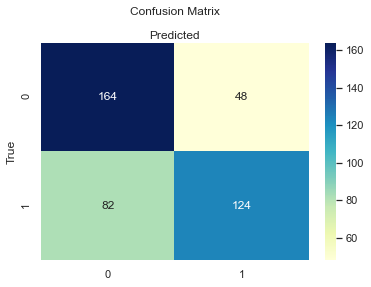

In [178]:
# with all features
model = LogisticRegression()
model.fit(X_train, y_train)
print("All Features")
print("\n")
print("Model Coefficients")
print(model.coef_, model.intercept_)
print("\n")

y_pred = model.predict(X_test)

print("Accuracy training:", model.score(X_train, y_train))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("\n")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# with 11 features selected from kNN
print("kNN Features")
print("\n")
model1 = LogisticRegression()
model1.fit(X_train[:, k14], y_train)
print("Model Coefficients")
print(model1.coef_, model1.intercept_)
print("\n")

y_pred1 = model1.predict(X_test[:,k14])

print("Accuracy training:", model1.score(X_train[:, k14], y_train))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))
print("Precision:", metrics.precision_score(y_test, y_pred1))
print("Recall:", metrics.recall_score(y_test, y_pred1))
print("\n")

# with 8 features selected from RandomForest importances
model2 = LogisticRegression()
print("RF Features")
print("\n")
model2.fit(X_train[:, top_eight], y_train)
print("Model Coefficients")
print(model2.coef_, model2.intercept_)
print("\n")

y_pred2 = model2.predict(X_test[:, top_eight])

print("Accuracy training:", model2.score(X_train[:, top_eight], y_train))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))
print("Precision:", metrics.precision_score(y_test, y_pred2))
print("Recall:", metrics.recall_score(y_test, y_pred2))

In [179]:
scores_log_ord = cross_val_score(model, X_train, y_train,cv=10)
log_CV_acc_ord = scores_log_ord.mean()
log_CV_std_ord = scores_log_ord.std()
print("CV Accuracy: ",log_CV_acc_ord)
print("CV Std. Dev.: ", log_CV_std_ord)

CV Accuracy:  0.6861876709446666
CV Std. Dev.:  0.028624622304342554


### Naive Bayes

In [180]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [181]:
features = df_ordinal.columns.tolist()

for var in features:
    print(df_ordinal[var].value_counts().sort_values(ascending=False) / df_ordinal.shape[0])
    print('=' * 30)
    print()

df_ordinal_no_outliers = df_ordinal.drop(columns = ['more_grammatically_correct','east_south_central'])

#outliers include the location east_south_central with less than 3% being from there

0    0.552764
1    0.447236
Name: more_grammatically_correct, dtype: float64

1    0.577889
0    0.422111
Name: heard_of_oxford_comma, dtype: float64

3    0.369706
2    0.259871
4    0.243360
1    0.127064
Name: care_about_oxford_comma, dtype: float64

1    0.803302
0    0.196698
Name: how_write_sentence, dtype: float64

0    0.509691
1    0.490309
Name: data_singular_plural, dtype: float64

2    0.385499
3    0.309404
1    0.188801
4    0.116296
Name: debate_over_data, dtype: float64

5    0.659727
4    0.305097
3    0.023690
2    0.007897
1    0.003589
Name: importance_of_grammar, dtype: float64

1    0.542714
0    0.457286
Name: gender, dtype: float64

3    0.337401
4    0.261307
2    0.224695
1    0.176597
Name: age, dtype: float64

3    0.475951
2    0.155061
4    0.145729
1    0.127782
5    0.095477
Name: household_income, dtype: float64

4    0.379038
3    0.278536
5    0.240488
2    0.091170
1    0.010768
Name: education, dtype: float64

0.0    0.848528
1.0    0.151472
Name: e

In [182]:
features = df_ordinal_no_outliers.columns.tolist()
#look at possible multicolinearity
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_ordinal_no_outliers.values, i) for i in range(len(features))]
vif["Features"] = features
vif

##there is a lot of multicollinearity, so we can get rid of some of redundancies to ensure it is following Bayes rule


,VIF,Features
0,2.786521,heard_of_oxford_comma
1,12.229523,care_about_oxford_comma
2,5.346651,how_write_sentence
3,2.442944,data_singular_plural
4,10.684067,debate_over_data
5,44.577310,importance_of_grammar
6,2.306184,gender
7,9.050847,age
8,9.978973,household_income
9,18.467524,education


In [183]:
no_multicollinearity_df = df_ordinal.drop(columns = ['more_grammatically_correct','care_about_oxford_comma','debate_over_data','importance_of_grammar','education'])

#get new list of features with low multicollinearity levels
features = no_multicollinearity_df.columns.to_list()
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(no_multicollinearity_df.values, i) for i in range(len(features))]
vif["Features"] = features
vif

,VIF,Features
0,1.114759,heard_of_oxford_comma
1,1.106058,how_write_sentence
2,1.117481,data_singular_plural
3,1.026816,gender
4,1.181095,age
5,1.086714,household_income
6,4.395798,east_north_central
7,1.942270,east_south_central
8,4.109737,middle_atlantic
9,2.631401,mountain


In [184]:
vif_ind = [df_ordinal.drop(columns='more_grammatically_correct').columns.get_loc(c) for c in list(vif['Features']) if c in df_ordinal.columns]
vif_ind

[0, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18]

#### Categorical Naive Bayes

In [185]:
cnb = CategoricalNB()
cnb.fit(X_train[:,vif_ind], y_train)

y_pred_cnb = cnb.predict(X_test[:,vif_ind])
y_prob_pred_cnb = cnb.predict_proba(X_test[:,vif_ind])
# how did our model perform?
count_misclassified = (y_test != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))
print("Recall score : ", recall_score(y_test, y_pred_cnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_cnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_cnb , average='micro'))

CategoricalNB
Misclassified samples: 139
Accuracy: 0.67
Recall score :  0.6674641148325359
Precision score :  0.6674641148325359
F1 score :  0.6674641148325359


In [186]:
scores_nb_ord = cross_val_score(cnb, X_train[:,vif_ind], y_train,cv=10)
nb_CV_acc_ord = scores_nb_ord.mean()
nb_CV_std_ord = scores_nb_ord.std()
print("CV Accuracy: ",nb_CV_acc_ord)
print("CV Std. Dev.: ", nb_CV_std_ord)

CV Accuracy:  0.6533242162844519
CV Std. Dev.:  0.04058606758574031


#### Gaussian Naive Bayes

In [187]:
gnb = GaussianNB()
gnb.fit(X_train[:,vif_ind], y_train)

y_pred_gnb = gnb.predict(X_test[:,vif_ind])
y_prob_pred_gnb = gnb.predict_proba(X_test[:,vif_ind])
# how did our model perform?
count_misclassified = (y_test != y_pred_gnb).sum()

print("GaussianNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Accuracy: {:.2f}'.format(accuracy))
print("Recall score : ", recall_score(y_test, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='micro'))

GaussianNB
Misclassified samples: 173
Accuracy: 0.59
Recall score :  0.5861244019138756
Precision score :  0.5861244019138756
F1 score :  0.5861244019138756


#### Bernoulli Naive Bayes

In [188]:
bnb = BernoulliNB()
bnb.fit(X_train[:,vif_ind], y_train)

y_pred_bnb = bnb.predict(X_test[:,vif_ind])
y_prob_pred_bnb = bnb.predict_proba(X_test[:,vif_ind])
# how did our model perform?
count_misclassified = (y_test != y_pred_bnb).sum()

print("BernoulliNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_bnb)
print('Accuracy: {:.2f}'.format(accuracy))
print("Recall score : ", recall_score(y_test, y_pred_bnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_bnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_bnb , average='micro'))

BernoulliNB
Misclassified samples: 179
Accuracy: 0.57
Recall score :  0.5717703349282297
Precision score :  0.5717703349282297
F1 score :  0.5717703349282297


## Support Vector Machine

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Perform grid search to identify best C and gamma parameter

In [190]:
%%capture
kernels = ['rbf','sigmoid','linear']
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train,y_train)
  best_params[kernel] = grid.best_params_

In [191]:
best_params

{'rbf': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 'sigmoid': {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'},
 'linear': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}

In [192]:
print("All Features")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

All Features
rbf  Test Accuracy: 0.6818181818181818
sigmoid  Test Accuracy: 0.6674641148325359
linear  Test Accuracy: 0.6818181818181818


In [193]:
scores_svm_ord = cross_val_score(svclassifier, X_train, y_train,cv=10)
svm_CV_acc_ord = scores_svm_ord.mean()
svm_CV_std_ord = scores_svm_ord.std()
print("CV Accuracy: ",svm_CV_acc_ord)
print("CV Std. Dev.: ", svm_CV_std_ord)

CV Accuracy:  0.6862087102882392
CV Std. Dev.:  0.03699340816287669


kNN Features

In [194]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train[:,k14],y_train)
  best_params[kernel] = grid.best_params_

In [195]:
best_params

{'rbf': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 'sigmoid': {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'},
 'linear': {'C': 1, 'gamma': 1, 'kernel': 'linear'}}

In [196]:
print("kNN")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train[:,k14], y_train)
    y_pred = svclassifier.predict(X_test[:,k14])
    accuracy = accuracy_score(y_test,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

kNN
rbf  Test Accuracy: 0.6818181818181818
sigmoid  Test Accuracy: 0.6411483253588517
linear  Test Accuracy: 0.6363636363636364


Random Forest features

In [197]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train[:,top_eight],y_train)
  best_params[kernel] = grid.best_params_

In [198]:
best_params

{'rbf': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 'sigmoid': {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'},
 'linear': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}

In [199]:
print("Random Forest")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train[:,top_eight], y_train)
    y_pred = svclassifier.predict(X_test[:,top_eight])
    accuracy = accuracy_score(y_test,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

Random Forest
rbf  Test Accuracy: 0.6626794258373205
sigmoid  Test Accuracy: 0.6650717703349283
linear  Test Accuracy: 0.6650717703349283


# Binary Dataset

In [200]:
#Create new dataset with all binary variables to help with distance algorithms

#Drop rows with a lot of NAs as explained earlier
relabel1 = df.dropna(axis=0, thresh=min_count)

#Impute missing values

# use mode imputation for feature 3
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(relabel1[["How would you write the following sentence?"]])
relabel1["How would you write the following sentence?"] = imr.transform(relabel1[["How would you write the following sentence?"]])

# use mode imputation for feature 4
imr2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr2 = imr2.fit(relabel1[["When faced with using the word \"data\", have you ever spent time considering if the word was a singular or plural noun?"]])
relabel1["When faced with using the word \"data\", have you ever spent time considering if the word was a singular or plural noun?"] = imr2.transform(relabel1[["When faced with using the word \"data\", have you ever spent time considering if the word was a singular or plural noun?"]])

# use mode imputation for feature 5
imr3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr3 = imr3.fit(relabel1[["How much, if at all, do you care about the debate over the use of the word \"data\" as a singluar or plural noun?"]])
relabel1["How much, if at all, do you care about the debate over the use of the word \"data\" as a singluar or plural noun?"] = imr3.transform(relabel1[["How much, if at all, do you care about the debate over the use of the word \"data\" as a singluar or plural noun?"]])

# use mode imputation for feature 6
imr4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr4 = imr4.fit(relabel1[["In your opinion, how important or unimportant is proper use of grammar?"]])
relabel1["In your opinion, how important or unimportant is proper use of grammar?"] = imr4.transform(relabel1[["In your opinion, how important or unimportant is proper use of grammar?"]])

# use mode imputation for feature 7
imr5 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr5 = imr5.fit(relabel1[["Gender"]])
relabel1["Gender"] = imr5.transform(relabel1[["Gender"]])

# use mode imputation for feature 8
imr6 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr6 = imr6.fit(relabel1[["Age"]])
relabel1["Age"] = imr6.transform(relabel1[["Age"]])

# use mode imputation for feature 10
imr8 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr8 = imr8.fit(relabel1[["Education"]])
relabel1["Education"] = imr8.transform(relabel1[["Education"]])

# use logistic regression for feature 9
temp = relabel1[relabel1['Household Income'].isna()]

hi_mapping = {"$0 - $24,999": 1,
              "$25,000 - $49,999": 2,
              "$50,000 - $99,999": 3,
              "$100,000 - $149,999": 4,
              "$150,000+": 5}
temp["Household Income"] = temp["Household Income"].map(hi_mapping)

temp['Age'].replace({"18-29": 1,
               "30-44": 2,
               "45-60": 3,
               "> 60": 4},inplace=True)

temp['Gender'].replace({"Male":0,
                         "Female":1}, inplace=True)

temp['Education'].replace({"Less than high school degree": 1,
                "High school degree": 2,
                "Some college or Associate degree": 3,
                "Bachelor degree": 4,
                "Graduate degree": 5},inplace=True)

X_hi_test = temp.iloc[:, [8, 9, 11]]
exclude_index = temp.index
temp2 = relabel1.copy()
temp2 = temp2.drop(index=exclude_index)

temp2["Household Income"] = temp2["Household Income"].map(hi_mapping)

temp2['Age'].replace({"18-29": 1,
               "30-44": 2,
               "45-60": 3,
               "> 60": 4},inplace=True)

temp2['Gender'].replace({"Male":0,
                         "Female":1}, inplace=True)

temp2['Education'].replace({"Less than high school degree": 1,
                "High school degree": 2,
                "Some college or Associate degree": 3,
                "Bachelor degree": 4,
                "Graduate degree": 5},inplace=True)

X_hi_train = temp2.iloc[:, [8, 9, 11]]
y_hi_train = temp2.iloc[:, 10]

model_hi = LogisticRegression()
model_hi.fit(X_hi_train, y_hi_train)
y_hi_pred = model_hi.predict(X_hi_test)

temp["Household Income"] = y_hi_pred
relabel1.loc[exclude_index, "Household Income"] = temp.loc[:, "Household Income"]

hi_mapping1 = {"$0 - $24,999": 1,
              "$25,000 - $49,999": 2,
              "$50,000 - $99,999": 3,
              "$100,000 - $149,999": 4,
              "$150,000+": 5,
              1: 1,
              2: 2,
              3: 3}
relabel1.loc[:,"Household Income"] = relabel1.loc[:,"Household Income"].map(hi_mapping1)

# use mode imputation for feature 11
imr9 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr9 = imr9.fit(relabel1[["Location (Census Region)"]])
relabel1["Location (Census Region)"] = imr9.transform(relabel1[["Location (Census Region)"]])

#Relabel columns to shorten names in new column headers and create binary column for classification variable

relabel1['In your opinion, which sentence is more gramatically correct?'].replace({'It\'s important for a person to be honest, kind and loyal.': 0, 
                            'It\'s important for a person to be honest, kind, and loyal.': 1}, inplace=True)

relabel1['How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?'].replace({"Not at all": 'NotAtAll',
                         "Not much": 'NotMuch',
                         "Some": 'Some',
                         "A lot": 'ALot'}, inplace=True)
relabel1['How would you write the following sentence?'].replace({"Some experts say it's important to drink milk, but the data are inconclusive.":"Plural",
                                                                "Some experts say it's important to drink milk, but the data is inconclusive.": "Singular"},inplace=True)

relabel1['How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?'].replace({"Not at all": 'NotAtAll',
                         "Not much": 'NotMuch',
                         "Some": 'Some',
                         "A lot": 'ALot'}, inplace=True)

relabel1['In your opinion, how important or unimportant is proper use of grammar?'].replace({"Very unimportant": "VeryUnimportant",
                      "Somewhat unimportant": "SomewhatUnimportant",
                      "Neither important nor unimportant (neutral)": "Neutral",
                      "Somewhat important": "SomewhatImportant",
                      "Very important": "VeryImportant"}, inplace=True)

#Make all columns dummies

df_dummies = pd.get_dummies(relabel1, prefix='heard_of_oxford_comma', prefix_sep='\\', columns = ['Prior to reading about it above, had you heard of the serial (or Oxford) comma?'])
df_dummies = pd.get_dummies(df_dummies, prefix='care_about_oxford_comma', prefix_sep='\\', columns = ['How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?'])
df_dummies = pd.get_dummies(df_dummies, prefix='how_write_sentence', prefix_sep='\\', columns = ['How would you write the following sentence?'])
df_dummies = pd.get_dummies(df_dummies, prefix='consider_data_singular_plural', prefix_sep='\\', columns = ['When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?'])
df_dummies = pd.get_dummies(df_dummies, prefix='debate_over_data', prefix_sep='\\', columns = ['How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?'])
df_dummies = pd.get_dummies(df_dummies, prefix='importance_of_grammar', prefix_sep='\\', columns = ['In your opinion, how important or unimportant is proper use of grammar?'])
df_dummies = pd.get_dummies(df_dummies, prefix='gender', prefix_sep='\\', columns = ['Gender'])
df_dummies = pd.get_dummies(df_dummies, prefix='age', prefix_sep='\\', columns = ['Age'])
df_dummies = pd.get_dummies(df_dummies, prefix='household_income', prefix_sep='\\', columns = ['Household Income'])
df_dummies = pd.get_dummies(df_dummies, prefix='education', prefix_sep='\\', columns = ['Education'])
df_dummies = pd.get_dummies(df_dummies, prefix='location', prefix_sep='\\', columns = ['Location (Census Region)'])
df_dummies.rename(columns = {'In your opinion, which sentence is more gramatically correct?':'more_gramatically_correct'}, inplace = True)
df_dummies = df_dummies.drop(columns=['RespondentID'])
df_dummies = df_dummies.reset_index()
df_dummies = df_dummies.drop(columns=["index"])
df_dummies

,more_gramatically_correct,heard_of_oxford_comma\No,heard_of_oxford_comma\Yes,care_about_oxford_comma\ALot,care_about_oxford_comma\NotAtAll,care_about_oxford_comma\NotMuch,care_about_oxford_comma\Some,how_write_sentence\Plural,how_write_sentence\Singular,consider_data_singular_plural\No,...,education\Some college or Associate degree,location\East North Central,location\East South Central,location\Middle Atlantic,location\Mountain,location\New England,location\Pacific,location\South Atlantic,location\West North Central,location\West South Central
0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1095,0,1,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1096,1,0,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1097,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Resample data to make balance dataset

In [201]:
df_dummies.groupby(["more_gramatically_correct"])["more_gramatically_correct"].count()

more_gramatically_correct
0    476
1    623
Name: more_gramatically_correct, dtype: int64

In [202]:
np.random.seed(45)
only_zero_dum = df_dummies.loc[df_dummies["more_gramatically_correct"] == 0]
duplicates_dum = only_zero_dum.sample(n=147)
df_dummies = df_dummies.append(duplicates_dum, ignore_index=True)
df_dummies

,more_gramatically_correct,heard_of_oxford_comma\No,heard_of_oxford_comma\Yes,care_about_oxford_comma\ALot,care_about_oxford_comma\NotAtAll,care_about_oxford_comma\NotMuch,care_about_oxford_comma\Some,how_write_sentence\Plural,how_write_sentence\Singular,consider_data_singular_plural\No,...,education\Some college or Associate degree,location\East North Central,location\East South Central,location\Middle Atlantic,location\Mountain,location\New England,location\Pacific,location\South Atlantic,location\West North Central,location\West South Central
0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,1,0,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1242,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1243,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1244,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Partition data into train and test sets

In [203]:
X_dum, y_dum = df_dummies.iloc[:,1:].values, df_dummies.iloc[:,0].values
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, y_dum, test_size=0.3, random_state=0)

## Feature Selection - kNN, Random Forest, and PCA

### kNN for Feature Selection

#### Find optimal number of neighbors

[0.7213740458015268, 0.7099236641221374, 0.7061068702290076, 0.7213740458015268, 0.7290076335877863, 0.7099236641221374, 0.7022900763358778, 0.6908396946564885]


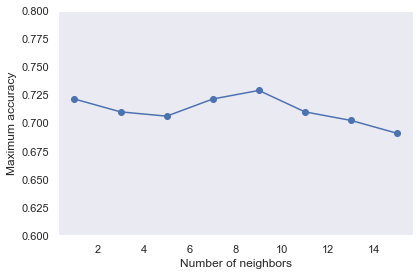

In [204]:
max_accuracy_dum = []
for i in [1,3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors=i)
    sbs = SBS(knn, k_features=1)
    sbs.fit(X_train_dum, y_train_dum)
    max_accuracy_dum.append(max(sbs.scores_))
print(max_accuracy_dum)

plt.plot([1,3,5,7,9,11,13,15], max_accuracy_dum, marker='o')
plt.ylim([0.6,0.8])
plt.ylabel("Maximum accuracy")
plt.xlabel("Number of neighbors")
plt.grid()
plt.tight_layout()
plt.show()

# choose 9 nearest neighbor

#### Similarily, find optimal number of features

[0.5954198473282443, 0.6603053435114504, 0.6755725190839694, 0.6717557251908397, 0.6603053435114504, 0.6641221374045801, 0.6679389312977099, 0.6755725190839694, 0.6679389312977099, 0.6717557251908397, 0.6755725190839694, 0.6793893129770993, 0.6717557251908397, 0.6793893129770993, 0.6908396946564885, 0.6755725190839694, 0.6679389312977099, 0.6717557251908397, 0.6755725190839694, 0.6755725190839694, 0.6870229007633588, 0.6870229007633588, 0.6755725190839694, 0.6717557251908397, 0.6793893129770993, 0.6717557251908397, 0.6755725190839694, 0.6946564885496184, 0.6946564885496184, 0.7099236641221374, 0.7290076335877863, 0.7290076335877863, 0.7175572519083969, 0.7137404580152672, 0.7022900763358778, 0.683206106870229, 0.6755725190839694, 0.6870229007633588, 0.6564885496183206, 0.6297709923664122, 0.5992366412213741, 0.5801526717557252, 0.5610687022900763, 0.5877862595419847]
Max accuracy: 0.7290076335877863


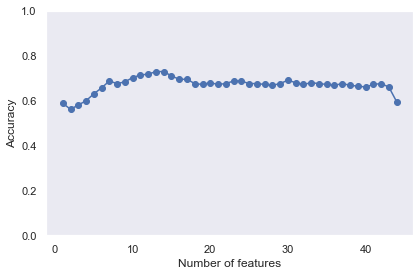

In [205]:
knn = KNeighborsClassifier(n_neighbors=9)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_dum, y_train_dum)

k_features_dum = [len(k) for k in sbs.subsets_]
print(sbs.scores_)
print("Max accuracy:", max(sbs.scores_))

plt.plot(k_features_dum, sbs.scores_, marker='o')
plt.ylim([0,1])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

In [206]:
# choose 14 features
k14_dum = list(sbs.subsets_[30])
# from each number of dimensions starting with the max num, it appended the combination that yields 
# the highest accuracy
print(len(k14_dum))
print(df_dummies.columns[1:][k14_dum])

14
Index(['heard_of_oxford_comma\No', 'care_about_oxford_comma\ALot',
       'care_about_oxford_comma\Some', 'how_write_sentence\Plural',
       'consider_data_singular_plural\No', 'debate_over_data\NotMuch',
       'debate_over_data\Some', 'importance_of_grammar\SomewhatImportant',
       'age\45-60', 'age\> 60', 'household_income\1',
       'education\Graduate degree', 'education\High school degree',
       'education\Some college or Associate degree'],
      dtype='object')


### Random Forest for Feature Selection

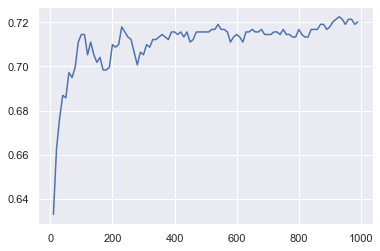

In [207]:
from sklearn.ensemble import RandomForestClassifier

oob_vals_dum = []
vary_num_trees_dum = list(range(10,1000,10))
for i in vary_num_trees_dum:
    forest = RandomForestClassifier(n_estimators=i, random_state=0, oob_score=True)
    forest.fit(X_train_dum, y_train_dum)
    oob_vals_dum.append(forest.oob_score_)
plt.plot(vary_num_trees_dum, oob_vals_dum)
plt.show()

In [215]:
# choose 600 n_estimators
feat_labels_dum = df_dummies.columns[1:]
forest = RandomForestClassifier(n_estimators=600, random_state=0, oob_score=True)
forest.fit(X_train_dum, y_train_dum)
print(forest.score(X_train_dum, y_train_dum))
print(forest.oob_score_)

importances_dum = forest.feature_importances_

indices_dum = np.argsort(importances_dum)[::-1]

#for f in range(X_train_dum.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels_dum[indices_dum[f]], importances_dum[indices_dum[f]]))


0.9931192660550459
0.7144495412844036


In [216]:
# threshhold of 0.02
top_thirtytwo = [c for c in indices_dum if importances_dum[indices_dum[c]]>.02]

### PCA for feature selection

In [217]:
#PCA to reduce new increase in dimensionality
from scipy import linalg 

X = df_dummies.iloc[:,1:]
y = df_dummies.iloc[:,0]

Determine number of components

In [218]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

#trial and error showed that n_components would give us 95% explained variation
n_components = 25

#run PCA
pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

#calculate explained variance
exp_var = np.cumsum(pca.explained_variance_ratio_)

total_var = pca.explained_variance_ratio_.sum() * 100

print(f"Total Explained Variance: {total_var:.2f}%")


Total Explained Variance: 95.38%


In [219]:
#fit model
model = pca.fit(X)
X_pc = model.transform(X)

#number of components
n_pcs= model.components_.shape[0]

#most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

#get all feature names
initial_feature_names = X.columns

# get the names for each component
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe showing each feature for each component
df_PCs = pd.DataFrame(dic.items())
df_PCs.rename(columns = {0:'PC',
                         1:'Features'}, inplace = True)

#dataset with PC features
df_dummies_PC = df_dummies.drop(columns="more_gramatically_correct")

#list of PC features indices
top_25_PCA = [df_dummies_PC.columns.get_loc(c) for c in list(df_PCs['Features']) if c in df_dummies_PC]

#### Partition data again for models

In [220]:
X_dif_dum, y_dif_dum = df_dummies.iloc[:,1:].values, df_dummies.iloc[:,0].values
X_train_dif_dum, X_test_dif_dum, y_train_dif_dum, y_test_dif_dum = train_test_split(X_dif_dum, y_dif_dum, test_size=0.3, random_state=123)

## Model Results with Binary Dataset

### kNN

In [221]:

# with all features
knn.fit(X_train_dif_dum, y_train_dif_dum)
print("All Features")
print("Training accuracy:", knn.score(X_train_dif_dum, y_train_dif_dum))
print("Testing accuracy:", knn.score(X_test_dif_dum, y_test_dif_dum))
print("\n")

# with 14 features selected from kNN
knn.fit(X_train_dif_dum[:, k14_dum], y_train_dif_dum)
print("kNN Features")
print("Training accuracy:", knn.score(X_train_dif_dum[:, k14_dum], y_train_dif_dum))
print("Testing accuracy:", knn.score(X_test_dif_dum[:, k14_dum], y_test_dif_dum))
print("\n")

# with 32 features selected from RF
knn.fit(X_train_dif_dum[:, top_thirtytwo], y_train_dif_dum)
print("Random Forest Features")
print("Training accuracy:", knn.score(X_train_dif_dum[:, top_thirtytwo], y_train_dif_dum))
print("Testing accuracy:", knn.score(X_test_dif_dum[:, top_thirtytwo], y_test_dif_dum))
print("\n")

# with 25 features selected from PCA
knn.fit(X_train_dif_dum[:, top_25_PCA], y_train_dif_dum)
print("PCA Features")
print("Training accuracy:", knn.score(X_train_dif_dum[:, top_25_PCA], y_train_dif_dum))
print("Testing accuracy:", knn.score(X_test_dif_dum[:, top_25_PCA], y_test_dif_dum))

All Features
Training accuracy: 0.7362385321100917
Testing accuracy: 0.6577540106951871


kNN Features
Training accuracy: 0.7362385321100917
Testing accuracy: 0.6390374331550802


Random Forest Features
Training accuracy: 0.7247706422018348
Testing accuracy: 0.6417112299465241


PCA Features
Training accuracy: 0.6823394495412844
Testing accuracy: 0.6149732620320856


In [222]:
scores_kNN_dum = cross_val_score(knn, X_train_dif_dum, y_train_dif_dum,cv=10)
kNN_CV_acc_dum = scores_kNN_dum.mean()
kNN_CV_std_dum = scores_kNN_dum.std()
print("CV Accuracy: ",kNN_CV_acc_dum)
print("CV Std. Dev.: ", kNN_CV_std_dum)

CV Accuracy:  0.6353578892371996
CV Std. Dev.:  0.056889092360771554


### Random Forest

In [223]:
# with all features
forest.fit(X_train_dif_dum, y_train_dif_dum)
print("All Features")
print("Training accuracy:", forest.score(X_train_dif_dum, y_train_dif_dum))
print("Testing accuracy:", forest.score(X_test_dif_dum, y_test_dif_dum))
print("\n")

# with features selected from kNN
forest.fit(X_train_dif_dum[:, k14_dum], y_train_dif_dum)
print("kNN Features")
print("Training accuracy:", forest.score(X_train_dif_dum[:, k14_dum], y_train_dif_dum))
print("Testing accuracy:", forest.score(X_test_dif_dum[:, k14_dum], y_test_dif_dum))
print("\n")

# with features selected from RF
forest.fit(X_train_dif_dum[:, top_thirtytwo], y_train_dif_dum)
print("Random Forest Features")
print("Training accuracy:", forest.score(X_train_dif_dum[:, top_thirtytwo], y_train_dif_dum))
print("Testing accuracy:", forest.score(X_test_dif_dum[:, top_thirtytwo], y_test_dif_dum))
print("\n")

forest.fit(X_train_dif_dum[:, top_25_PCA], y_train_dif_dum)
print("PCA Features")
print("Training accuracy:", forest.score(X_train_dif_dum[:, top_25_PCA], y_train_dif_dum))
print("Testing accuracy:", forest.score(X_test_dif_dum[:, top_25_PCA], y_test_dif_dum))

All Features
Training accuracy: 0.9919724770642202
Testing accuracy: 0.7352941176470589


kNN Features
Training accuracy: 0.8704128440366973
Testing accuracy: 0.679144385026738


Random Forest Features
Training accuracy: 0.9529816513761468
Testing accuracy: 0.6470588235294118


PCA Features
Training accuracy: 0.9793577981651376
Testing accuracy: 0.6764705882352942


In [224]:
scores_RF_dum = cross_val_score(forest, X_train_dif_dum, y_train_dif_dum,cv=10)
RF_CV_acc_dum = scores_RF_dum.mean()
RF_CV_std_dum = scores_RF_dum.std()
print("CV Accuracy: ",RF_CV_acc_dum)
print("CV Std. Dev.: ", RF_CV_std_dum)

CV Accuracy:  0.695010449320794
CV Std. Dev.:  0.04322360630778653


### Logistic Regression

All Features
Accuracy training: 0.6834862385321101
Accuracy: 0.6684491978609626
Precision: 0.625
Recall: 0.6764705882352942


kNN Features
Accuracy training: 0.6536697247706422
Accuracy: 0.679144385026738
Precision: 0.6404494382022472
Recall: 0.6705882352941176


Random Forest Features
Accuracy training: 0.661697247706422
Accuracy: 0.6684491978609626
Precision: 0.625
Recall: 0.6764705882352942


PCA Features
Accuracy training: 0.6651376146788991
Accuracy: 0.6363636363636364
Precision: 0.5913978494623656
Recall: 0.6470588235294118


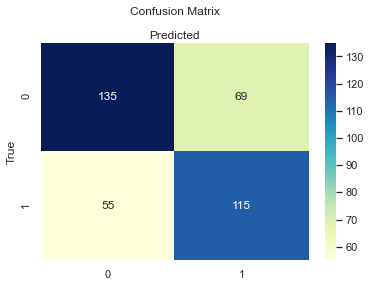

In [225]:
# with all features
model = LogisticRegression()
model.fit(X_train_dum, y_train_dum)
# print(model.coef_, model.intercept_)

y_pred_dum = model.predict(X_test_dum)

print("All Features")
print("Accuracy training:", model.score(X_train_dum, y_train_dum))
print("Accuracy:", metrics.accuracy_score(y_test_dum, y_pred_dum))
print("Precision:", metrics.precision_score(y_test_dum, y_pred_dum))
print("Recall:", metrics.recall_score(y_test_dum, y_pred_dum))
print("\n")

confusion_matrix = metrics.confusion_matrix(y_test_dum, y_pred_dum)
labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# with 17 features selected from kNN
model1 = LogisticRegression()
model1.fit(X_train_dum[:, k14_dum], y_train_dum)
# print(model1.coef_, model1.intercept_)

y_pred1_dum = model1.predict(X_test_dum[:,k14_dum])
print("kNN Features")
print("Accuracy training:", model1.score(X_train_dum[:, k14_dum], y_train_dum))
print("Accuracy:", metrics.accuracy_score(y_test_dum, y_pred1_dum))
print("Precision:", metrics.precision_score(y_test_dum, y_pred1_dum))
print("Recall:", metrics.recall_score(y_test_dum, y_pred1_dum))
print("\n")

# with 32 features selected from RandomForest importances
model2 = LogisticRegression()
model2.fit(X_train_dum[:, top_thirtytwo], y_train_dum)
# print(model2.coef_, model2.intercept_)

y_pred2_dum = model2.predict(X_test_dum[:, top_thirtytwo])
print("Random Forest Features")
print("Accuracy training:", model2.score(X_train_dum[:, top_thirtytwo], y_train_dum))
print("Accuracy:", metrics.accuracy_score(y_test_dum, y_pred2_dum))
print("Precision:", metrics.precision_score(y_test_dum, y_pred2_dum))
print("Recall:", metrics.recall_score(y_test_dum, y_pred2_dum))
print("\n")

# with 25 features selected from PCA components
model3 = LogisticRegression()
model3.fit(X_train_dum[:, top_25_PCA], y_train_dum)
# print(model2.coef_, model2.intercept_)

y_pred3_dum = model3.predict(X_test_dum[:, top_25_PCA])
print("PCA Features")
print("Accuracy training:", model3.score(X_train_dum[:, top_25_PCA], y_train_dum))
print("Accuracy:", metrics.accuracy_score(y_test_dum, y_pred3_dum))
print("Precision:", metrics.precision_score(y_test_dum, y_pred3_dum))
print("Recall:", metrics.recall_score(y_test_dum, y_pred3_dum))

In [226]:
scores_log_dum = cross_val_score(model1, X_train_dum[:,k14_dum], y_train_dum,cv=10)
log_CV_acc_dum = scores_log_dum.mean()
log_CV_std_dum = scores_log_dum.std()
print("CV Accuracy: ",log_CV_acc_dum)
print("CV Std. Dev.: ", log_CV_std_dum)

CV Accuracy:  0.6376828631138975
CV Std. Dev.:  0.025205429741356457


## Support Vector Machine

All Features

In [227]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train_dum,y_train_dum)
  best_params[kernel] = grid.best_params_

In [228]:
best_params

{'rbf': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 'sigmoid': {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'},
 'linear': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}

In [229]:
print("All Features")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train_dum, y_train_dum)
    y_pred = svclassifier.predict(X_test_dum)
    accuracy = accuracy_score(y_test_dum,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

All Features
rbf  Test Accuracy: 0.6684491978609626
sigmoid  Test Accuracy: 0.6818181818181818
linear  Test Accuracy: 0.6818181818181818


kNN Features

In [230]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train_dum[:,k14_dum],y_train_dum)
  best_params[kernel] = grid.best_params_

In [231]:
best_params

{'rbf': {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 'sigmoid': {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'},
 'linear': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}

In [232]:
print("kNN")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train_dum[:,k14_dum], y_train_dum)
    y_pred = svclassifier.predict(X_test_dum[:,k14_dum])
    accuracy = accuracy_score(y_test_dum,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

kNN
rbf  Test Accuracy: 0.6657754010695187
sigmoid  Test Accuracy: 0.6898395721925134
linear  Test Accuracy: 0.6898395721925134


In [233]:
scores_svm_dum = cross_val_score(svclassifier, X_train_dum[:,k14_dum], y_train_dum,cv=10,scoring='accuracy')
svm_CV_acc_dum = scores_svm_dum.mean()
svm_CV_std_dum = scores_svm_dum.std()
print("CV Accuracy: ",svm_CV_acc_dum)
print("CV Std. Dev.: ", svm_CV_std_dum)

CV Accuracy:  0.6273380355276907
CV Std. Dev.:  0.034405710226934574


Random Forest Features

In [234]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train_dum[:,top_thirtytwo],y_train_dum)
  best_params[kernel] = grid.best_params_

In [235]:
best_params

{'rbf': {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 'sigmoid': {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 'linear': {'C': 10, 'gamma': 1, 'kernel': 'linear'}}

In [236]:
print("Random Forest")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train_dum[:,top_thirtytwo], y_train_dum)
    y_pred = svclassifier.predict(X_test_dum[:,top_thirtytwo])
    accuracy = accuracy_score(y_test_dum,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

Random Forest
rbf  Test Accuracy: 0.6256684491978609
sigmoid  Test Accuracy: 0.6497326203208557
linear  Test Accuracy: 0.6737967914438503


PCA Features

In [237]:
%%capture
best_params = {}

for kernel in kernels:
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [kernel]}
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
  grid = grid.fit(X_train_dum[:,top_25_PCA],y_train_dum)
  best_params[kernel] = grid.best_params_

In [238]:
best_params

{'rbf': {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 'sigmoid': {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'},
 'linear': {'C': 10, 'gamma': 1, 'kernel': 'linear'}}

In [239]:
print("PCA Features")
for kernel in kernels:
    svclassifier = SVC(kernel=kernel,C=best_params[kernel]['C'], gamma=best_params[kernel]['gamma'])
    svclassifier.fit(X_train_dum[:,top_25_PCA], y_train_dum)
    y_pred = svclassifier.predict(X_test_dum[:,top_25_PCA])
    accuracy = accuracy_score(y_test_dum,y_pred)
    print(kernel,' Test Accuracy:',accuracy)

PCA Features
rbf  Test Accuracy: 0.6524064171122995
sigmoid  Test Accuracy: 0.6283422459893048
linear  Test Accuracy: 0.6470588235294118


# Model Comparison

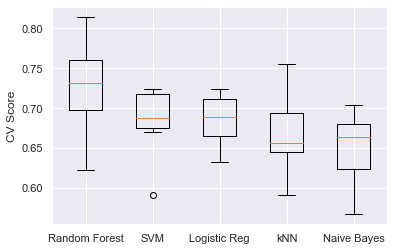

In [257]:
results_ord = [scores_RF_ord, scores_svm_ord, scores_log_ord, scores_kNN_ord, scores_nb_ord]
names_ord = ['Random Forest', 'SVM', 'Logistic Reg', 'kNN', 'Naive Bayes']

# boxplot algorithm comparison
fig = plt.figure()
#fig.suptitle('Algorithm Comparison - Ordinal')
ax = fig.add_subplot(111)
plt.boxplot(results_ord)
ax.set_xticklabels(names_ord)
plt.ylabel("CV Score")
plt.show()

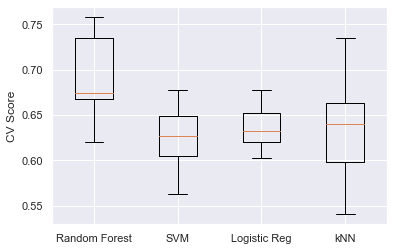

In [258]:
results_dum = [scores_RF_dum, scores_svm_dum, scores_log_dum, scores_kNN_dum]
names_dum = ['Random Forest', 'SVM', 'Logistic Reg', 'kNN']

# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.suptitle('Algorithm Comparison - Ordinal')
plt.boxplot(results_dum)
ax.set_xticklabels(names_dum)
plt.ylabel("CV Score")
plt.show()